In [1]:
import numpy as np
from numpy import genfromtxt 
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

from persim import plot_diagrams
from ripser import ripser, lower_star_img

import csv

## My old left-to-right scanning example, applied to letter #9 (a.k.a. I)

Our function on the image will be very simple: if the value we see in the corresponding row is 0 then the value on the pixel is 100, if the value is 1 then the value is the x1 coordinate.

(10, 10)
[[100 100 100 100 100 100 100 100 100 100]
 [100 100 100   4   5   6 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100 100   5 100 100 100 100 100]
 [100 100 100   4   5   6 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


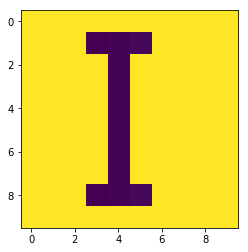

In [2]:
# read in file of letters 
letters = genfromtxt('data/letters.csv', delimiter=',') 

# take one of the letters 
letter_one_line=letters[8,:] 

# initialize matrix of size 10x10 with all values 100 
letter=np.full((10, 10), 100) 

# convert one line letter to 10x10 matrix replacing zeros with 100 
for k in range(1,101): 
    if letter_one_line[k]==1.0: 
        row=int((k-1)/10) 
        column=(k-1)%10 
        letter[row,column]=k%10 
print(letter.shape) 
print(letter) 

# see what we got

plt.imshow(letter)
plt.show()

[[ 4.  5.]
 [ 4. inf]]


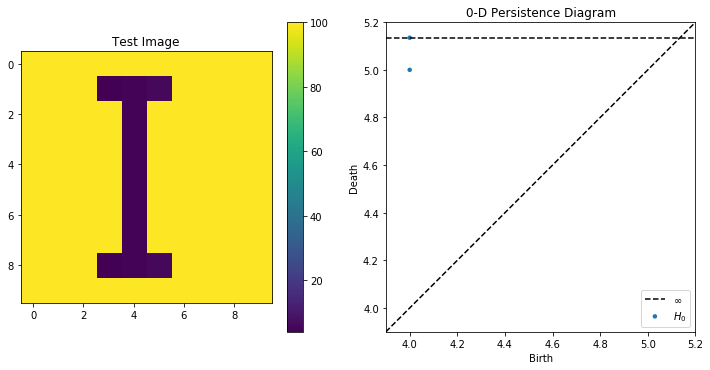

In [3]:
dgm = lower_star_img(letter)
print(dgm)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(letter)
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_diagrams(dgm)
plt.title("0-D Persistence Diagram")
plt.tight_layout()
plt.show()

## Batch process left-to-right scanning of all letters

Now we loop through all letters and generate 26 diagrams as arrays.

In [4]:
dgmLR = [None]*26 
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=k%10            
    dgmLR[i] = lower_star_img(letter)

In [5]:
# see what we got
print(dgmLR[0:25])

[array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 4.,  5.],
       [ 4., inf]]), array([[ 4.,  6.],
       [ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 6.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 3.,  8.],
       [ 3., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3.,  4.],
       [ 3., inf]]), array([[ 3., inf]])]


## Batch process diagonal scanning-from-upper-left of all letters

We loop through all letters and generate 26 diagrams as arrays.

In [6]:
dgmSUL = [None]*26 
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=k%10 + int((k-1)/10)         
    dgmSUL[i] = lower_star_img(letter)

In [7]:
# see what we got
print(dgmSUL[0:25])

[array([[ 5., inf]]), array([[ 3., inf]]), array([[ 5., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 8.,  9.],
       [ 4., inf]]), array([[ 5., inf]]), array([[11., 12.],
       [ 5., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 8.,  9.],
       [ 3., inf]]), array([[ 8., 11.],
       [ 3., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[12., 14.],
       [ 4., inf]]), array([[ 4., inf]]), array([[11., 15.],
       [ 4., inf]]), array([[ 3., inf]]), array([[ 9., 15.],
       [ 4., inf]]), array([[ 9., 11.],
       [ 3., inf]]), array([[ 7.,  9.],
       [10., 13.],
       [ 3., inf]]), array([[ 8.,  9.],
       [ 4., inf]]), array([[ 8., 10.],
       [ 4., inf]])]


## Batch process probing-from-upper-left of all letters

We loop through all letters and generate 26 diagrams as arrays.

In [8]:
dgmPUL = [None]*26 
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=max((k-1)%10,int((k-1)/10))         
    dgmPUL[i] = lower_star_img(letter)

In [9]:
# see what we got
print(dgmPUL[0:25])

[array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 1., inf]]), array([[ 1., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 6.,  7.],
       [ 2., inf]]), array([[ 4.,  5.],
       [ 2., inf]]), array([[ 2., inf]]), array([[ 1., inf]]), array([[ 7.,  8.],
       [ 2., inf]]), array([[ 5.,  6.],
       [ 1., inf]]), array([[ 4.,  5.],
       [ 1., inf]]), array([[ 2., inf]]), array([[ 2., inf]])]


## Batch process probing-from-lower-right of all letters

We loop through all letters and generate 26 diagrams as arrays.

In [10]:
dgmPLR = [None]*26 
for i in range(26):
    letter_one_line=letters[i,:]

    # initialize matrix of size 10x10 with all values 100
    letter=np.full((10, 10), 100)

    # convert one line letter to 10x10 matrix replacing zeros with 100
    for k in range(1,101):
        if letter_one_line[k]==1.0:
            row=int((k-1)/10) 
            column=(k-1)%10 
            letter[row,column]=max(9-(k-1)%10,9-int((k-1)/10))         
    dgmPLR[i] = lower_star_img(letter)

In [11]:
# see what we got
print(dgmPLR[0:25])

[array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 2., inf]]), array([[ 5.,  7.],
       [ 2., inf]]), array([[ 5., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 4., inf]]), array([[ 4., inf]]), array([[ 3., inf]]), array([[ 3., inf]]), array([[ 5.,  7.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 7.,  8.],
       [ 2., inf]]), array([[ 4., inf]]), array([[ 7.,  8.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 2., inf]]), array([[ 5., inf]]), array([[ 2., inf]]), array([[ 4., inf]]), array([[ 5.,  6.],
       [ 2., inf]]), array([[ 3., inf]]), array([[ 4., inf]])]


In [12]:
from numpy import inf
vector = [None]*8
mtx=[None]*26

for i in range(len(dgmPLR)):
    print(i)
    a=dgmLR[i]
    sm=0
    for j in range(len(a)):
        a2=a[j]
        a3=[100 if x==inf else x for x in a2] 
        print(a3)
        sm=a3[1]-a3[0]+sm
        print(sm)
    vector[0]=len(a)
    vector[1]=sm
    a=dgmSUL[i]
    sm=0
    for j in range(len(a)):
        a2=a[j]
        a3=[100 if x==inf else x for x in a2] 
        print(a3)
        sm=a3[1]-a3[0]+sm
        print(sm)
    vector[2]=len(a)
    vector[3]=sm
    a=dgmPUL[i]
    sm=0
    for j in range(len(a)):
        a2=a[j]
        a3=[100 if x==inf else x for x in a2] 
        print(a3)
        sm=a3[1]-a3[0]+sm
        print(sm)
    vector[4]=len(a)
    vector[5]=sm
    a=dgmPLR[i]
    sm=0
    print(len(a))
    for j in range(len(a)):
        a2=a[j]
        a3=[100 if x==inf else x for x in a2] 
        print(a3)
        sm=a3[1]-a3[0]+sm
        print(sm)
    vector[6]=len(a)
    vector[7]=sm
    mtx[i]=vector.copy()
print(mtx)

0
[2.0, 100]
98.0
[5.0, 100]
95.0
[3.0, 100]
97.0
1
[2.0, 100]
98.0
1
[3.0, 100]
97.0
[3.0, 100]
97.0
[2.0, 100]
98.0
1
[2.0, 100]
98.0
2
[2.0, 100]
98.0
[5.0, 100]
95.0
[2.0, 100]
98.0
1
[2.0, 100]
98.0
3
[3.0, 100]
97.0
[4.0, 100]
96.0
[2.0, 100]
98.0
1
[2.0, 100]
98.0
4
[3.0, 100]
97.0
[4.0, 100]
96.0
[2.0, 100]
98.0
2
[5.0, 7.0]
2.0
[2.0, 100]
100.0
5
[3.0, 100]
97.0
[4.0, 100]
96.0
[2.0, 100]
98.0
1
[5.0, 100]
95.0
6
[2.0, 100]
98.0
[4.0, 100]
96.0
[2.0, 100]
98.0
1
[3.0, 100]
97.0
7
[3.0, 100]
97.0
[8.0, 9.0]
1.0
[4.0, 100]
97.0
[2.0, 100]
98.0
1
[3.0, 100]
97.0
8
[4.0, 5.0]
1.0
[4.0, 100]
97.0
[5.0, 100]
95.0
[3.0, 100]
97.0
1
[4.0, 100]
96.0
9
[4.0, 6.0]
2.0
[4.0, 100]
98.0
[11.0, 12.0]
1.0
[5.0, 100]
96.0
[3.0, 100]
97.0
1
[4.0, 100]
96.0
10
[3.0, 100]
97.0
[4.0, 100]
96.0
[2.0, 100]
98.0
1
[3.0, 100]
97.0
11
[3.0, 100]
97.0
[4.0, 100]
96.0
[2.0, 100]
98.0
1
[3.0, 100]
97.0
12
[2.0, 100]
98.0
[8.0, 9.0]
1.0
[3.0, 100]
98.0
[1.0, 100]
99.0
2
[5.0, 7.0]
2.0
[2.0, 100]
100.0
13
[

In [13]:
import numpy
max_dist=-1
v1=0
v2=0
for i in range(len(mtx)):
    for j in range(len(mtx)):
        a=numpy.array(mtx[i])
        b=numpy.array(mtx[j])
        dist=numpy.linalg.norm(a-b)
        print('distance', dist,'between letters',i,j)
        if dist > max_dist:
            max_dist=dist
            v1=i
            v2=j
            print('found larger distance:',max_dist,'letters:',v1,v2)
print('max distance:', max_dist, 'letters',v1,v2)        

distance 0.0 between letters 0 0
found larger distance: 0.0 letters: 0 0
distance 2.449489742783178 between letters 0 1
found larger distance: 2.449489742783178 letters: 0 1
distance 1.0 between letters 0 2
distance 1.7320508075688772 between letters 0 3
distance 2.8284271247461903 between letters 0 4
found larger distance: 2.8284271247461903 letters: 0 4
distance 3.4641016151377544 between letters 0 5
found larger distance: 3.4641016151377544 letters: 0 5
distance 1.7320508075688772 between letters 0 6
distance 2.8284271247461903 between letters 0 7
distance 2.449489742783178 between letters 0 8
distance 2.6457513110645907 between letters 0 9
distance 2.0 between letters 0 10
distance 2.0 between letters 0 11
distance 4.358898943540674 between letters 0 12
found larger distance: 4.358898943540674 letters: 0 12
distance 5.5677643628300215 between letters 0 13
found larger distance: 5.5677643628300215 letters: 0 13
distance 2.0 between letters 0 14
distance 2.6457513110645907 between le

distance 3.605551275463989 between letters 7 16
distance 2.0 between letters 7 17
distance 6.0 between letters 7 18
distance 2.6457513110645907 between letters 7 19
distance 5.291502622129181 between letters 7 20
distance 3.3166247903554 between letters 7 21
distance 6.082762530298219 between letters 7 22
distance 1.4142135623730951 between letters 7 23
distance 1.4142135623730951 between letters 7 24
distance 6.48074069840786 between letters 7 25
distance 2.449489742783178 between letters 8 0
distance 3.1622776601683795 between letters 8 1
distance 2.6457513110645907 between letters 8 2
distance 2.6457513110645907 between letters 8 3
distance 4.47213595499958 between letters 8 4
distance 2.0 between letters 8 5
distance 2.23606797749979 between letters 8 6
distance 2.8284271247461903 between letters 8 7
distance 0.0 between letters 8 8
distance 1.7320508075688772 between letters 8 9
distance 2.0 between letters 8 10
distance 2.0 between letters 8 11
distance 5.744562646538029 between 

distance 4.123105625617661 between letters 16 11
distance 2.0 between letters 16 12
distance 3.4641016151377544 between letters 16 13
distance 3.0 between letters 16 14
distance 4.69041575982343 between letters 16 15
distance 0.0 between letters 16 16
distance 3.872983346207417 between letters 16 17
distance 4.123105625617661 between letters 16 18
distance 4.69041575982343 between letters 16 19
distance 4.795831523312719 between letters 16 20
distance 3.7416573867739413 between letters 16 21
distance 4.47213595499958 between letters 16 22
distance 3.0 between letters 16 23
distance 4.123105625617661 between letters 16 24
distance 3.872983346207417 between letters 16 25
distance 2.8284271247461903 between letters 17 0
distance 2.0 between letters 17 1
distance 2.23606797749979 between letters 17 2
distance 1.7320508075688772 between letters 17 3
distance 3.4641016151377544 between letters 17 4
distance 2.449489742783178 between letters 17 5
distance 1.7320508075688772 between letters 17

distance 2.8284271247461903 between letters 23 8
distance 1.7320508075688772 between letters 23 9
distance 2.0 between letters 23 10
distance 2.0 between letters 23 11
distance 3.605551275463989 between letters 23 12
distance 3.3166247903554 between letters 23 13
distance 2.8284271247461903 between letters 23 14
distance 2.23606797749979 between letters 23 15
distance 3.0 between letters 23 16
distance 2.449489742783178 between letters 23 17
distance 5.0990195135927845 between letters 23 18
distance 2.6457513110645907 between letters 23 19
distance 5.477225575051661 between letters 23 20
distance 3.3166247903554 between letters 23 21
distance 6.082762530298219 between letters 23 22
distance 0.0 between letters 23 23
distance 2.0 between letters 23 24
distance 5.656854249492381 between letters 23 25
distance 4.0 between letters 24 0
distance 2.449489742783178 between letters 24 1
distance 3.872983346207417 between letters 24 2
distance 3.0 between letters 24 3
distance 4.69041575982343 

In [14]:
import numpy
min_dist=1000000
v1=0
v2=0
for i in range(len(mtx)):
    for j in range(len(mtx)):
        if not i==j:
            a=numpy.array(mtx[i])
            b=numpy.array(mtx[j])
            dist=numpy.linalg.norm(a-b)
            print('distance', dist,'between letters',i,j)
            if dist < min_dist:
                min_dist=dist
                v1=i
                v2=j
                print('found smaller distance:',min_dist,'letters:',v1,v2)
print('min distance:', min_dist, 'letters',v1,v2)        

distance 2.449489742783178 between letters 0 1
found smaller distance: 2.449489742783178 letters: 0 1
distance 1.0 between letters 0 2
found smaller distance: 1.0 letters: 0 2
distance 1.7320508075688772 between letters 0 3
distance 2.8284271247461903 between letters 0 4
distance 3.4641016151377544 between letters 0 5
distance 1.7320508075688772 between letters 0 6
distance 2.8284271247461903 between letters 0 7
distance 2.449489742783178 between letters 0 8
distance 2.6457513110645907 between letters 0 9
distance 2.0 between letters 0 10
distance 2.0 between letters 0 11
distance 4.358898943540674 between letters 0 12
distance 5.5677643628300215 between letters 0 13
distance 2.0 between letters 0 14
distance 2.6457513110645907 between letters 0 15
distance 4.358898943540674 between letters 0 16
distance 2.8284271247461903 between letters 0 17
distance 6.6332495807108 between letters 0 18
distance 4.123105625617661 between letters 0 19
distance 7.483314773547883 between letters 0 20
di

distance 2.0 between letters 8 5
distance 2.23606797749979 between letters 8 6
distance 2.8284271247461903 between letters 8 7
distance 1.7320508075688772 between letters 8 9
distance 2.0 between letters 8 10
distance 2.0 between letters 8 11
distance 5.744562646538029 between letters 8 12
distance 5.744562646538029 between letters 8 13
distance 3.7416573867739413 between letters 8 14
distance 1.7320508075688772 between letters 8 15
distance 5.385164807134504 between letters 8 16
distance 2.8284271247461903 between letters 8 17
distance 7.483314773547883 between letters 8 18
distance 3.3166247903554 between letters 8 19
distance 7.745966692414834 between letters 8 20
distance 5.385164807134504 between letters 8 21
distance 8.660254037844387 between letters 8 22
distance 2.8284271247461903 between letters 8 23
distance 3.4641016151377544 between letters 8 24
distance 7.483314773547883 between letters 8 25
distance 2.6457513110645907 between letters 9 0
distance 3.0 between letters 9 1
d

distance 4.123105625617661 between letters 17 12
distance 4.358898943540674 between letters 17 13
distance 2.8284271247461903 between letters 17 14
distance 1.7320508075688772 between letters 17 15
distance 3.872983346207417 between letters 17 16
distance 6.782329983125268 between letters 17 18
distance 2.6457513110645907 between letters 17 19
distance 6.164414002968976 between letters 17 20
distance 3.605551275463989 between letters 17 21
distance 6.855654600401044 between letters 17 22
distance 2.449489742783178 between letters 17 23
distance 2.8284271247461903 between letters 17 24
distance 6.0 between letters 17 25
distance 6.6332495807108 between letters 18 0
distance 6.0 between letters 18 1
distance 6.557438524302 between letters 18 2
distance 6.557438524302 between letters 18 3
distance 6.928203230275509 between letters 18 4
distance 7.211102550927978 between letters 18 5
distance 5.916079783099616 between letters 18 6
distance 6.0 between letters 18 7
distance 7.48331477354788